# Cursos de Series de tiempo con *Machine Learning*
## Modulo. Wordcloud - Machine Learning Time Series
                        Elaborado por: Naren Castellon

<center><img src="./imagen/wordcloud ts.png" width="500" height="500"></center>

# Contenido

1. Introducción
3. Caso de estudio: Forecasting Retweet
4. Cargamos librerias y datos
5. Analisis Exploratorio de Datos
6. Modelando con machine learning
7. Evaluar el rendimiento del modelo.
8. Conclusión

# Introducción

En la era digital actual, las redes sociales han transformado la forma en que nos comunicamos y compartimos información. El acto de retwittear en plataformas como Twitter se ha convertido en una poderosa herramienta para difundir contenido y amplificar mensajes. En este contexto, el forecasting de retweets se presenta como un desafío apasionante y crucial para comprender la viralidad y la propagación de información en línea.

El análisis de sentimiento de los retweets nos permite explorar las emociones y actitudes detrás de cada interacción, brindando una visión más profunda de cómo se percibe y se comparte el contenido en la red. La utilización de técnicas de machine learning para el forecasting de retweets nos brinda la capacidad de predecir patrones de comportamiento y tendencias, permitiéndonos anticipar qué tipo de contenido es más probable que se vuelva viral y genere un alto nivel de compromiso.

Al combinar la visualización de datos a través de wordclouds, el análisis de sentimiento y el poder predictivo del machine learning, podemos desentrañar los misterios de la viralidad en las redes sociales y extraer conocimientos valiosos para optimizar estrategias de contenido, campañas de marketing y la toma de decisiones informadas en un mundo digitalmente conectado.

# **Caso de Estudio: Forecasting de Retweets en Twitter con Machine Learning Time Series y Análisis de Sentimiento**

En este caso de estudio, examinaremos cómo una empresa de medios digitales utilizó técnicas avanzadas de machine learning, específicamente modelos de time series y análisis de sentimiento, para predecir el número de retweets que recibirían sus publicaciones en Twitter. El objetivo era optimizar la estrategia de contenido y aumentar la participación de la audiencia en la plataforma.

### Descripción del Problema
La empresa se enfrentaba al desafío de maximizar el impacto de sus publicaciones en Twitter, buscando aumentar la visibilidad y el compromiso de la audiencia. Para lograr este objetivo, era crucial identificar patrones en el comportamiento de retweeting y comprender cómo el sentimiento expresado en los tweets influía en la interacción de la audiencia.

### Metodología
1. **Recopilación de Datos:** Se recopilaron datos históricos de publicaciones en Twitter, incluyendo el texto del tweet, la fecha y hora de publicación, el número de retweets y los datos de sentimiento asociados.
   
2. **Análisis de Sentimiento:** Se aplicó un análisis de sentimiento para evaluar la polaridad de los tweets (positivo, negativo, neutral) y capturar las emociones expresadas en el contenido.

3. **Modelado de Machine Learning Time Series:** Se implementó un modelo de machine learning de series temporales para predecir el número de retweets futuros en función de variables como la hora del día, el día de la semana, el sentimiento del tweet y el histórico de retweets.

4. **Validación del Modelo:** El modelo se validó utilizando datos recientes y se ajustó para mejorar su precisión en la predicción de retweets.

### Resultados
- El análisis de sentimiento reveló que los tweets con un tono positivo y motivador tendían a recibir más retweets.
- El modelo de time series demostró ser capaz de predecir con precisión el número de retweets esperados para una publicación dada, permitiendo a la empresa planificar su estrategia de contenido de manera más efectiva.
- La combinación de análisis de sentimiento y forecasting con machine learning permitió a la empresa entender mejor cómo las emociones en los tweets afectaban la interacción de la audiencia.

### Conclusiones
Al integrar técnicas de machine learning de time series y análisis de sentimiento en el forecasting de retweets en Twitter, la empresa logró mejorar la efectividad de su estrategia de contenido y aumentar la participación de la audiencia. Este enfoque basado en datos no solo permitió una planificación más precisa de las publicaciones en redes sociales, sino que también proporcionó información valiosa sobre cómo el sentimiento en los tweets influye en el compromiso de la audiencia, sentando las bases para futuras estrategias de comunicación más efectivas y centradas en el usuario.

# Cargamos las librerias y Datos

`pip install wordcloud`

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import seaborn as sns
from IPython.display import display
pd.options.mode.chained_assignment = None

# Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Getting data
tweets = pd.read_csv("./data/demonetization-tweets.csv",encoding = "ISO-8859-1")
#tweets = pd.read_csv("./data/tweets1.csv")
display(tweets.head(3))

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [3]:
tweets["created"] = pd.date_range(start='1/1/2020', periods= 14940, freq='1h40min')
#tweets.to_csv("tweets1.csv")

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     14940 non-null  int64         
 1   X              14940 non-null  int64         
 2   text           14940 non-null  object        
 3   favorited      14940 non-null  bool          
 4   favoriteCount  14940 non-null  int64         
 5   replyToSN      1102 non-null   object        
 6   created        14940 non-null  datetime64[ns]
 7   truncated      14940 non-null  bool          
 8   replyToSID     886 non-null    float64       
 9   id             14940 non-null  float64       
 10  replyToUID     1102 non-null   float64       
 11  statusSource   14940 non-null  object        
 12  screenName     14940 non-null  object        
 13  retweetCount   14940 non-null  int64         
 14  isRetweet      14940 non-null  bool          
 15  retweeted      1494

In [5]:
tweets['text_new'] = ''

import re

for i in range(len(tweets['text'])):
    m = re.search('(?<=:)(.*)', tweets['text'][i])
    try:
        tweets['text_new'][i]=m.group(0)
    except AttributeError:
        tweets['text_new'][i]=tweets['text'][i]
        
print(tweets['text_new'].head())        

0     Critical question: Was PayTM informed about #...
1     Did you vote on #Demonetization on Modi surve...
2     Former FinSec, RBI Dy Governor, CBDT Chair + ...
3     Gurugram (Haryana): Post office employees pro...
4     Reddy Wedding! @mail_today cartoon #demonetiz...
Name: text_new, dtype: object


**Part I: WordCloud**
---------------------

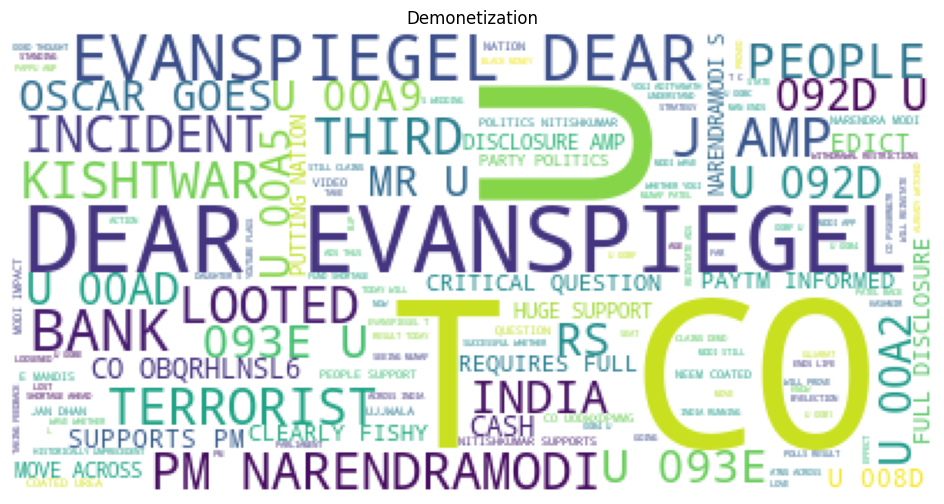

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def wordcloud_by_province(tweets):
    plt.figure(figsize = (18,6))
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    #Narendra Modi is the Prime minister of India
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets['text_new'].str.upper()]))
    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Demonetization")

wordcloud_by_province(tweets)  

**¿"Desde los terroristas"? ¿"Narendra Modi"? Vale. Debemos seguir investigando. Creo que debemos investigar por separado los tuits con las palabras "terroristas" y "narendramodi"**

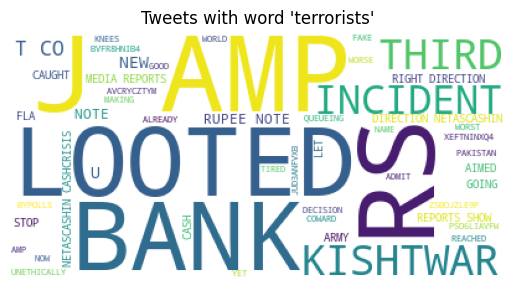

In [7]:
def wordcloud_by_province(tweets):
    
    a = pd.DataFrame(tweets['text'].str.contains("terrorists").astype(int))
    b = list(a[a['text']==1].index.values)
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("terrorists")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("demonetization")
    stopwords.add("Demonetization co")
    stopwords.add("lakh")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets.loc[b, 'text_new'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets with word 'terrorists'")

wordcloud_by_province(tweets)  

**Es posible que The Demonitazation tenga un vínculo con Kishtwar y el terrorista**

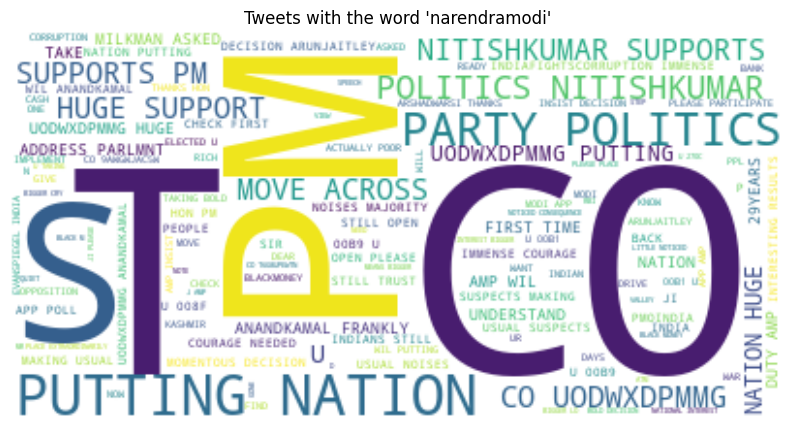

In [8]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    a = pd.DataFrame(tweets['text'].str.contains("narendramodi").astype(int))
    b = list(a[a['text'] == 1].index.values)
    
    stopwords = set(STOPWORDS)
    additional_stopwords = ["narendramodi", "https", "00A0", "00BD", "00B8", "ed", "demonetization", "Demonetization co", "lakh"]
    stopwords.update(additional_stopwords)
    
    wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state=2016).generate(" ".join([i for i in tweets.loc[b, 'text_new'].str.upper()]))
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Tweets with the word 'narendramodi'")
    plt.show()

wordcloud_by_province(tweets) 

**Creo que "PM" representa la palabra "Primer Ministro". ¿Los diferentes tuits con Narendramodi son de apoyo?**

**Part II: Timeseries plotting**
--------------------------------

In [9]:
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,text_new
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2020-01-01 00:00:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,Critical question: Was PayTM informed about #...
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2020-01-01 01:40:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,Did you vote on #Demonetization on Modi surve...
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2020-01-01 03:20:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,"Former FinSec, RBI Dy Governor, CBDT Chair + ..."
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2020-01-01 05:00:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,Gurugram (Haryana): Post office employees pro...
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2020-01-01 06:40:00,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,Reddy Wedding! @mail_today cartoon #demonetiz...


In [10]:
print(tweets['retweetCount'].describe())

count    14940.000000
mean       223.770147
std        411.793864
min          0.000000
25%          1.000000
50%         40.000000
75%        197.000000
max       5170.000000
Name: retweetCount, dtype: float64


In [11]:
tweets['nb_words'] = 0
for i in range(len(tweets['text'])):
    tweets['nb_words'][i] = len(tweets['text'][i].split(' '))

In [12]:
tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute

In [13]:
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,text_new,nb_words,hour,date,minute
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2020-01-01 00:00:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,Critical question: Was PayTM informed about #...,20,0,2020-01-01,0
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2020-01-01 01:40:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,Did you vote on #Demonetization on Modi surve...,11,1,2020-01-01,40
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2020-01-01 03:20:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,"Former FinSec, RBI Dy Governor, CBDT Chair + ...",21,3,2020-01-01,20
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2020-01-01 05:00:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,Gurugram (Haryana): Post office employees pro...,16,5,2020-01-01,0
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2020-01-01 06:40:00,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,Reddy Wedding! @mail_today cartoon #demonetiz...,9,6,2020-01-01,40


In [14]:
tweets_hour = tweets.groupby(['hour'])['retweetCount'].sum()
tweets_hour

hour
0     142775
1     146270
2     135298
3     139798
4     145379
5     132950
6     127694
7     129501
8     142485
9     151752
10    129628
11    149640
12    130847
13    133921
14    158515
15    134915
16    140973
17    140567
18    153565
19    129214
20    152478
21    129457
22    137053
23    128451
Name: retweetCount, dtype: int64

In [15]:
tweets_minute = tweets.groupby(['minute'])['retweetCount'].sum()
tweets['text_len'] = tweets['text'].str.len()
tweets_avgtxt_hour = tweets.groupby(['hour'])['text_len'].mean()
tweets_avgwrd_hour = tweets.groupby(['hour'])['nb_words'].mean()

Text(0.5, 1.0, 'The number of retweet by hour')

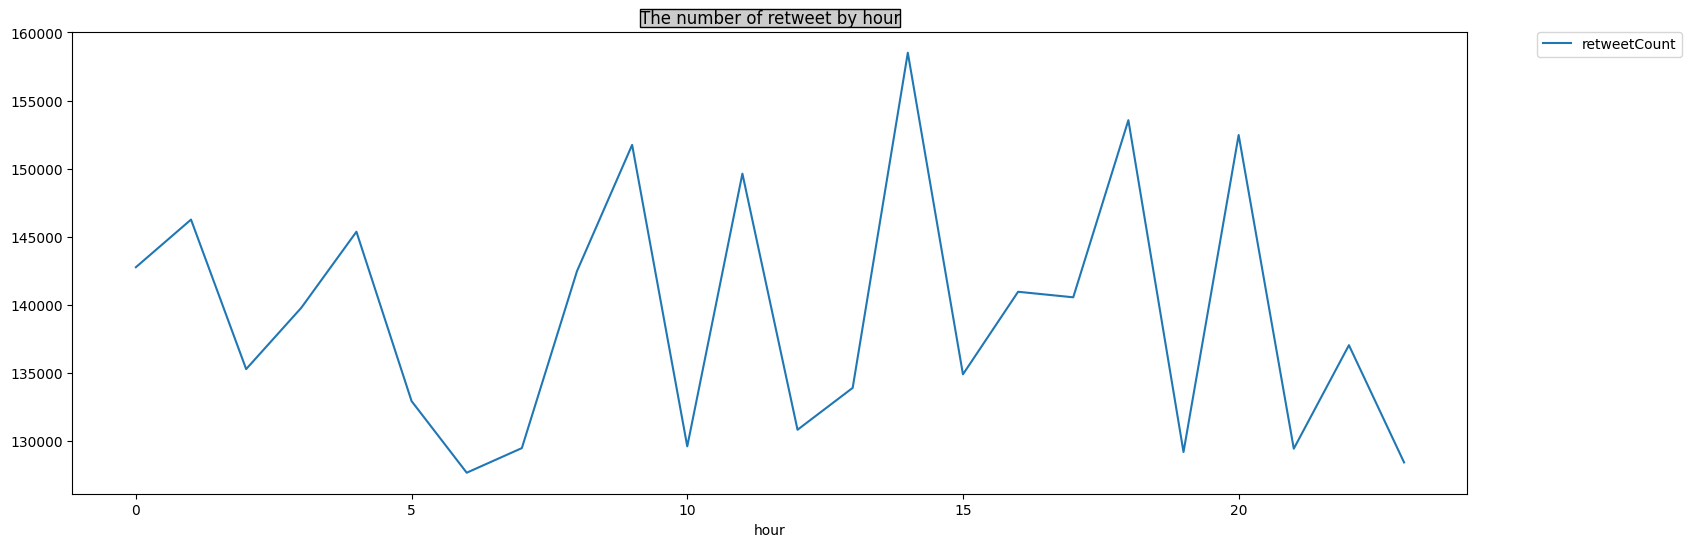

In [16]:
import seaborn as sns
tweets_hour.transpose().plot(kind='line',figsize=(18, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by hour', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The number of retweet by minute')

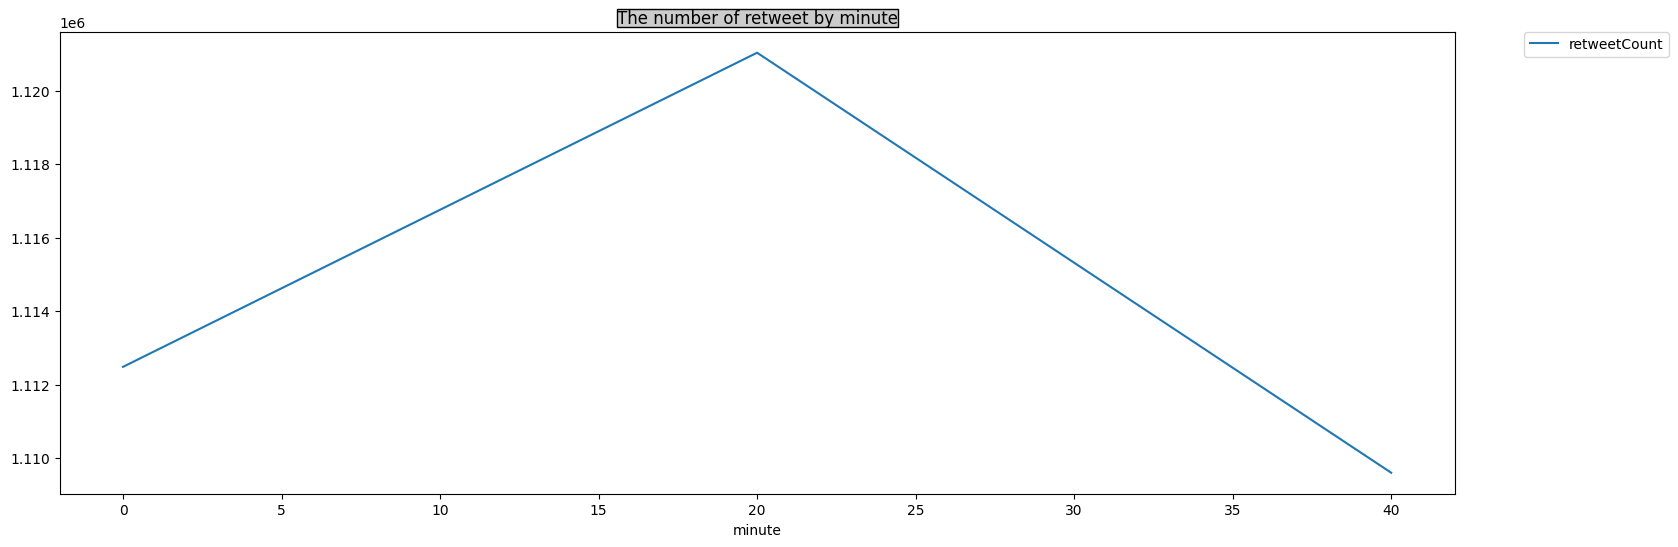

In [17]:
tweets_minute.transpose().plot(kind='line',figsize=(18, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of retweet by minute', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The Average of lenght by hour')

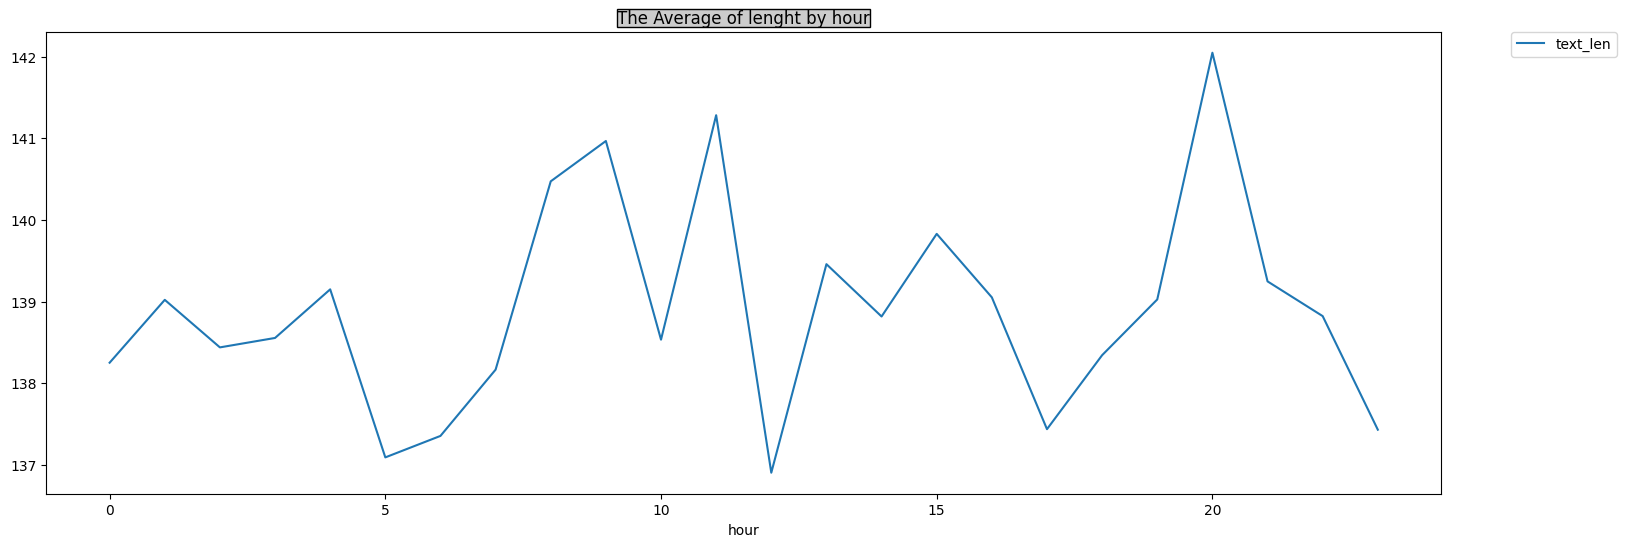

In [18]:
tweets_avgtxt_hour.transpose().plot(kind='line',figsize=(18, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average of lenght by hour', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The Average number of words by hour')

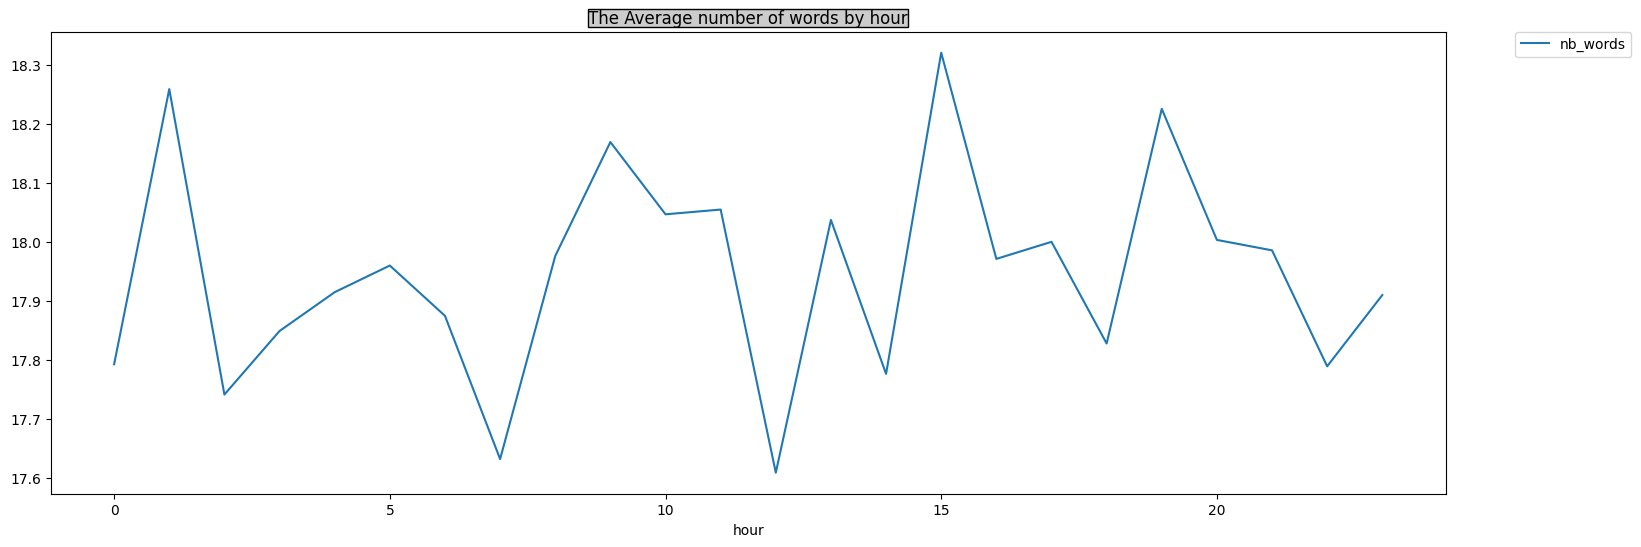

In [19]:
tweets_avgwrd_hour.transpose().plot(kind='line',figsize=(18, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average number of words by hour', bbox={'facecolor':'0.8', 'pad':0})

In [20]:
#print(get_corpus(tweets['text']))

In [21]:
def get_stop_words(s, n):
	'''
	:s : pd.Series; each element as a list of words from tokenization
	:n : int; n most frequent words are judged as stop words 

	:return : list; a list of stop words
	'''
	from collections import Counter
	l = get_corpus(s)
	l = [x for x in Counter(l).most_common(n)]
	return l

def get_corpus(s):
	'''
	:s : pd.Series; each element as a list of words from tokenization

	:return : list; corpus from s
	'''
	l = []
	s.map(lambda x: l.extend(x))
	return l



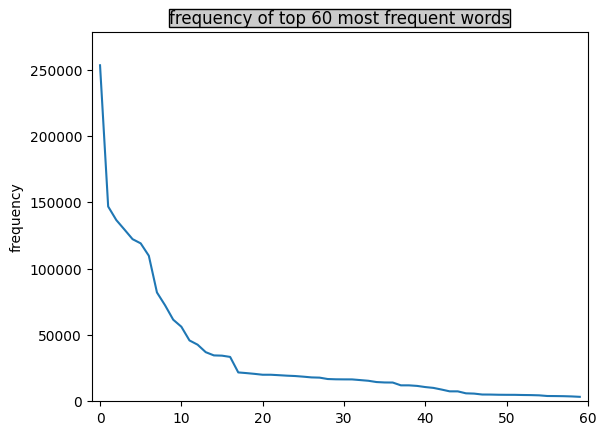

In [22]:
freqwords = get_stop_words(tweets['text'],n=60)

freq = [s[1] for s in freqwords]

plt.title('frequency of top 60 most frequent words', bbox={'facecolor':'0.8', 'pad':0})
plt.plot(freq)
plt.xlim([-1,60])
plt.ylim([0,1.1*max(freq)])
plt.ylabel('frequency')
plt.show()

**Part III: Source of tweets**
-----------------------

In [23]:
tweets['statusSource_new'] = ''

for i in range(len(tweets['statusSource'])):
    m = re.search('(?<=>)(.*)', tweets['statusSource'][i])
    try:
        tweets['statusSource_new'][i]=m.group(0)
    except AttributeError:
        tweets['statusSource_new'][i]=tweets['statusSource'][i]
        
#print(tweets['statusSource_new'].head())   

tweets['statusSource_new'] = tweets['statusSource_new'].str.replace('</a>', ' ', case=False)

In [24]:
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,text_new,nb_words,hour,date,minute,text_len,statusSource_new
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2020-01-01 00:00:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,Critical question: Was PayTM informed about #...,20,0,2020-01-01,0,144,Twitter for Android
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2020-01-01 01:40:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,Did you vote on #Demonetization on Modi surve...,11,1,2020-01-01,40,66,Twitter for Android
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2020-01-01 03:20:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,"Former FinSec, RBI Dy Governor, CBDT Chair + ...",21,3,2020-01-01,20,142,Twitter for Android
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2020-01-01 05:00:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,Gurugram (Haryana): Post office employees pro...,16,5,2020-01-01,0,140,Twitter for Android
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2020-01-01 06:40:00,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,Reddy Wedding! @mail_today cartoon #demonetiz...,9,6,2020-01-01,40,107,CPIMBadli


In [25]:
tweets['statusSource_new'] = tweets['statusSource_new'].str.replace('</a>', ' ', case=False)
#print(tweets[['statusSource_new','retweetCount']])

tweets_by_type = tweets.groupby(['statusSource_new'])['retweetCount'].sum()
#print(tweets_by_type)

Text(0.5, 1.0, 'Number of retweetcount by Source')

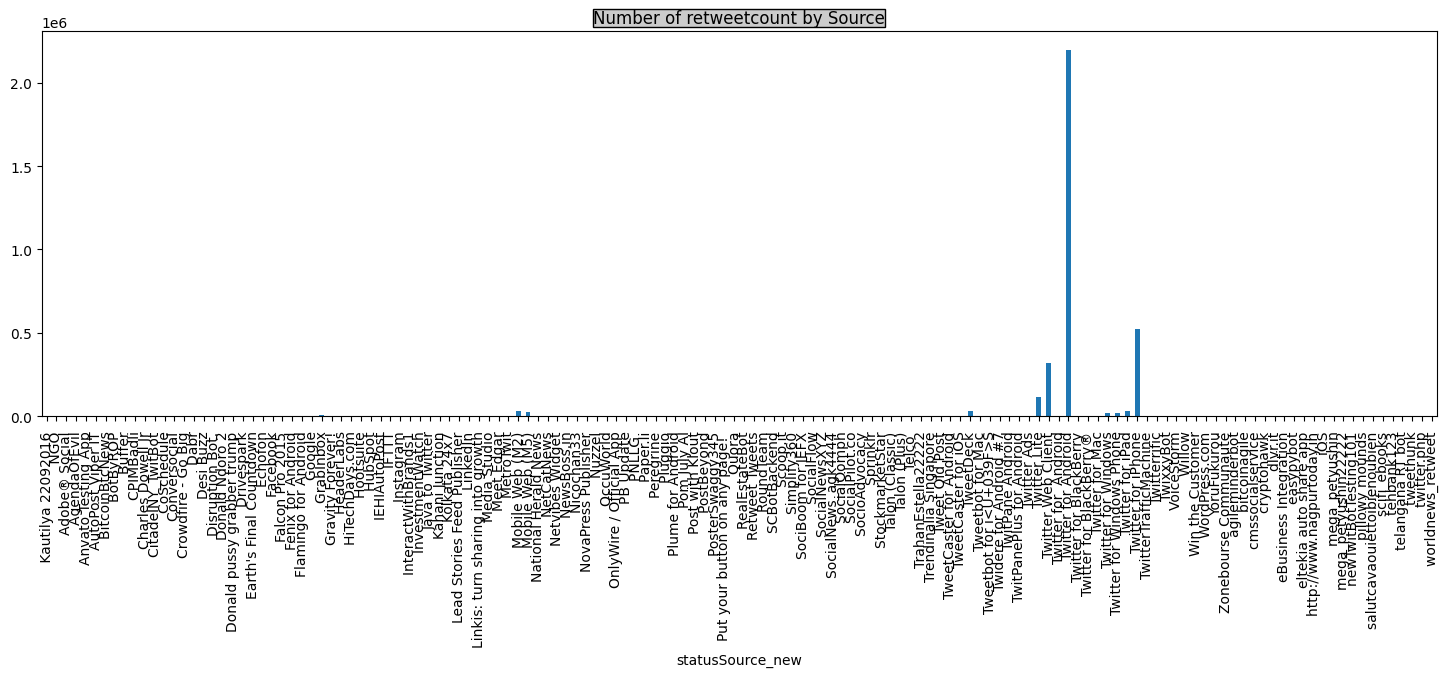

In [26]:
tweets_by_type.transpose().plot(kind='bar',figsize=(18, 5))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Number of retweetcount by Source', bbox={'facecolor':'0.8', 'pad':0})

**Los 3 mejores de Source: 1 - Twitter para Android 2 - Cliente web de Twitter y finalmente 3 - Twitter para iPhone!**

In [27]:
tweets['statusSource_new2'] = ''

for i in range(len(tweets['statusSource_new'])):
    if tweets['statusSource_new'][i] not in ['Twitter for Android ','Twitter Web Client ','Twitter for iPhone ']:
        tweets['statusSource_new2'][i] = 'Others'
    else:
        tweets['statusSource_new2'][i] = tweets['statusSource_new'][i] 
#print(tweets['statusSource_new2'])       

tweets_by_type2 = tweets.groupby(['statusSource_new2'])['retweetCount'].sum()
tweets_by_type2

statusSource_new2
Others                   307108
Twitter Web Client       318038
Twitter for Android     2197406
Twitter for iPhone       520574
Name: retweetCount, dtype: int64

Text(0.5, 1.0, 'Number of retweetcount by Source bis')

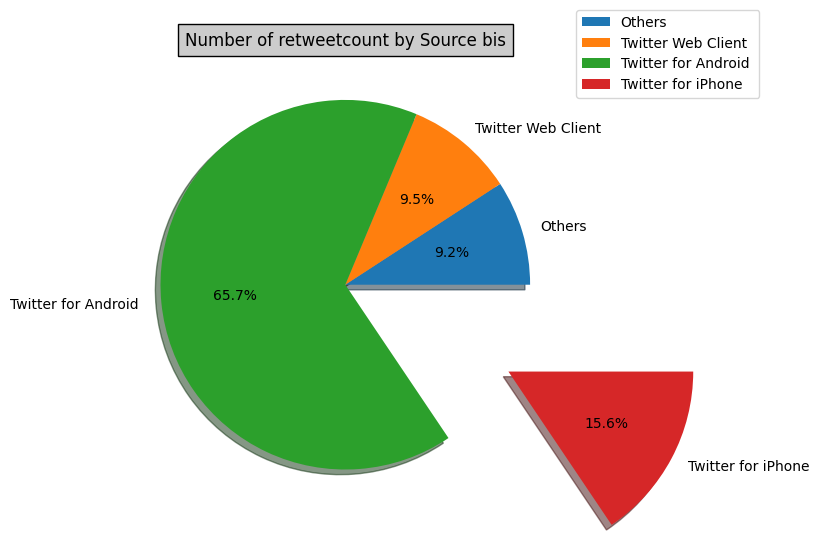

In [28]:
tweets_by_type2.rename("",inplace=True)
explode = (0, 0, 0, 1.0)
tweets_by_type2.transpose().plot(kind='pie',figsize=(18, 6),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of retweetcount by Source bis', bbox={'facecolor':'0.8', 'pad':5})

Text(0, 0.5, 'Tweet Count')

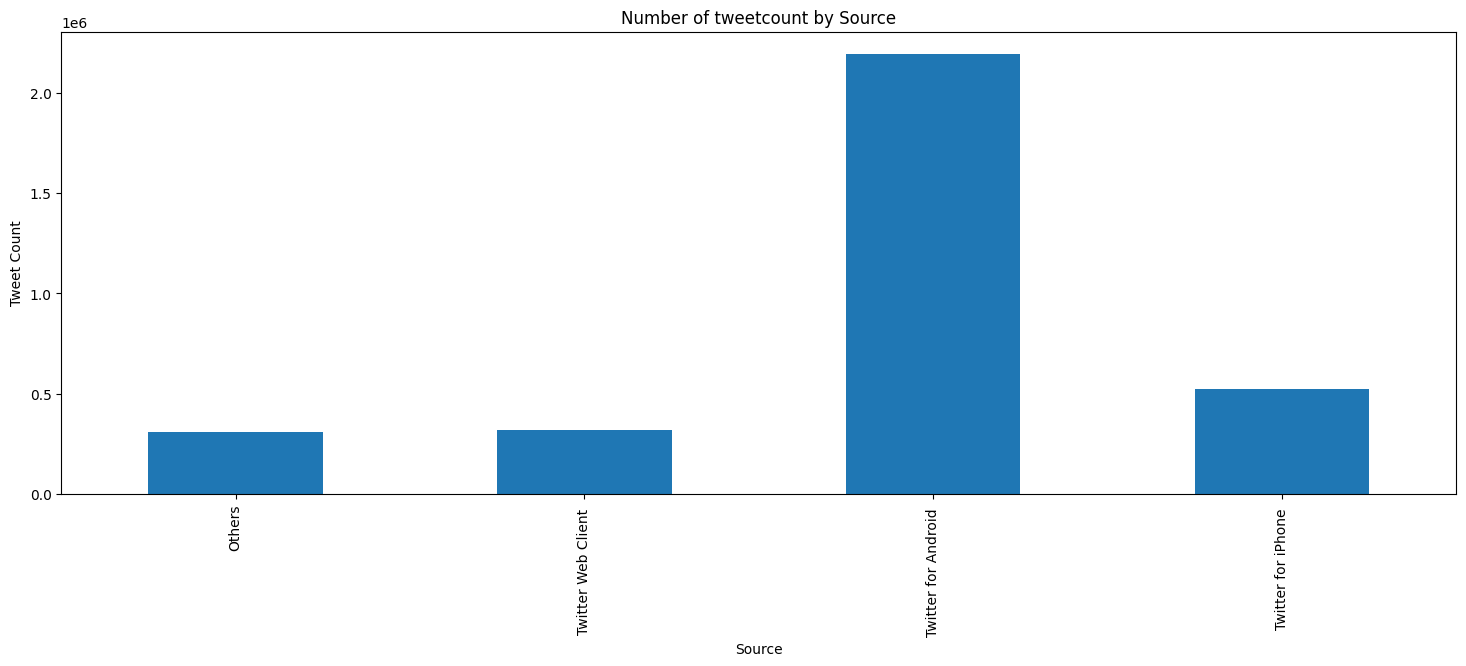

In [29]:
tweets_by_type2.rename("",inplace=True)
explode = (0, 0, 0, 0, 1.0)
tweets_by_type2.transpose().plot(kind='bar', figsize = (18,6))
plt.title("Number of tweetcount by Source")
plt.xlabel('Source')
plt.ylabel('Tweet Count')

## Análisis de Sentimiento

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/user/Documents/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,text_new,nb_words,hour,date,minute,text_len,statusSource_new,statusSource_new2
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2020-01-01 00:00:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,Critical question: Was PayTM informed about #...,20,0,2020-01-01,0,144,Twitter for Android,Twitter for Android
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2020-01-01 01:40:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,Did you vote on #Demonetization on Modi surve...,11,1,2020-01-01,40,66,Twitter for Android,Twitter for Android
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2020-01-01 03:20:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,"Former FinSec, RBI Dy Governor, CBDT Chair + ...",21,3,2020-01-01,20,142,Twitter for Android,Twitter for Android
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2020-01-01 05:00:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,Gurugram (Haryana): Post office employees pro...,16,5,2020-01-01,0,140,Twitter for Android,Twitter for Android
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2020-01-01 06:40:00,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,Reddy Wedding! @mail_today cartoon #demonetiz...,9,6,2020-01-01,40,107,CPIMBadli,Others


In [32]:
sid = SentimentIntensityAnalyzer()

tweets['sentiment_compound_polarity']=tweets.text_new.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text_new.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text_new.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text_new.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,text_new,nb_words,hour,date,minute,text_len,statusSource_new,statusSource_new2,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2020-01-01 00:00:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,Critical question: Was PayTM informed about #...,20,0,2020-01-01,0,144,Twitter for Android,Twitter for Android,0.1027,0.762,0.11,0.129,POSITIVE
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2020-01-01 01:40:00,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,Did you vote on #Demonetization on Modi surve...,11,1,2020-01-01,40,66,Twitter for Android,Twitter for Android,0.0000,1.000,0.00,0.000,NEUTRAL
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2020-01-01 03:20:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,"Former FinSec, RBI Dy Governor, CBDT Chair + ...",21,3,2020-01-01,20,142,Twitter for Android,Twitter for Android,0.0000,1.000,0.00,0.000,NEUTRAL
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2020-01-01 05:00:00,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,Gurugram (Haryana): Post office employees pro...,16,5,2020-01-01,0,140,Twitter for Android,Twitter for Android,0.0000,1.000,0.00,0.000,NEUTRAL
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2020-01-01 06:40:00,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,Reddy Wedding! @mail_today cartoon #demonetiz...,9,6,2020-01-01,40,107,CPIMBadli,Others,0.0000,1.000,0.00,0.000,NEUTRAL


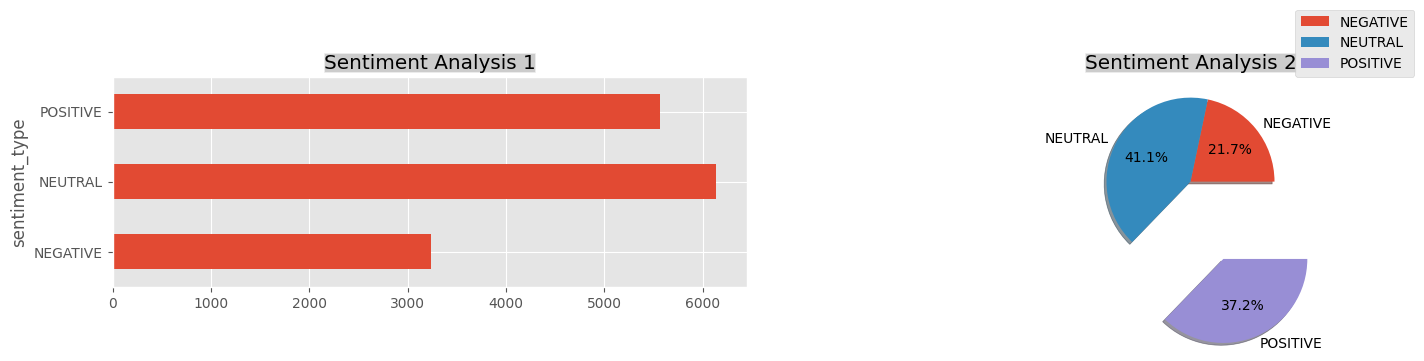

In [33]:
import matplotlib
matplotlib.style.use('ggplot')

tweets_sentiment = tweets.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentiment.rename("",inplace=True)
explode = (0, 0, 1.0)
plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(18, 6))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
plt.subplot(222)
tweets_sentiment.plot(kind='pie',figsize=(18, 6),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

**Part IV: Clustering with Kmeans**
--------------------------

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
X = vectorizer.fit_transform(tweets['text_new'])
print(X.shape)

(14940, 1432)


In [35]:
X

<14940x1432 sparse matrix of type '<class 'numpy.float64'>'
	with 91773 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

In [37]:
km.fit(X)

# Get feature names from the vectorizer
terms = vectorizer.get_feature_names_out()

# Order the centroids
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# Print the top terms per cluster
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: arvindkejriwal hitler know got officeofrg yes lord certainly bagwati hurting
Cluster 1: evanspiegel dear zone experts exchange exclusive execution executives exercise expanding
Cluster 2: https modi india amp people youtube pm cash impact effect
Cluster 3: kishtwar incident looted 40 terrorists lakh rs bank amp zone
Cluster 4: ed https 00a0 00bd 00b8 nation narendramodi pm huge support


**Es posible mejorar esto. Debemos eliminar las palabras "https"092d" "00a0" etc...**

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pos = pca.fit_transform(dist)
xs, ys = pos[:,0], pos[:,1]

In [40]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}#, 5: '#8A2BE2', 6: '#E9967A'}
#8A2BE2
##E9967A
#set up cluster names using a dict
cluster_names = {0: 'cluster 1', 
                 1: 'cluster 2', 
                 2: 'cluster 3', 
                 3: 'cluster 4', 
                 4: 'cluster 5'}
                 #5: 'cluster 6',
                 #6: 'cluster 7'}
clusters = km.labels_.tolist()

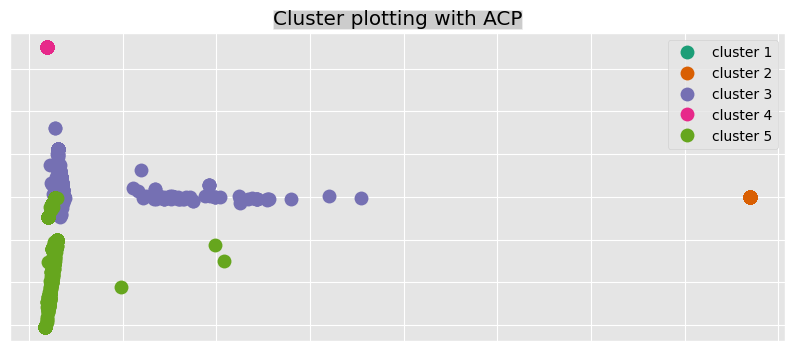

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the MDS results, cluster numbers, and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=''))

# Group by cluster
groups = df.groupby('label')

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.margins(0.05)

# Iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10,
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, top=False, labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster plotting with ACP', bbox={'facecolor': '0.8', 'pad': 0})

# Add labels in x,y position with the title as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=5)

plt.show()

**Es posible mostrar un título para cada punto, pero para que algo sea visible en este caso no se realiza.**

**Part V: Correlation between numerical features**
--------------------------------------------------

In [42]:
tweets["date"] =  pd.to_datetime(tweets["date"])

tweets.set_index("created", inplace = True)

In [43]:
tweets.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,text_new,nb_words,hour,date,minute,text_len,statusSource_new,statusSource_new2,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,Critical question: Was PayTM informed about #...,20,0,2020-01-01,0,144,Twitter for Android,Twitter for Android,0.1027,0.762,0.11,0.129,POSITIVE
2020-01-01 01:40:00,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,Did you vote on #Demonetization on Modi surve...,11,1,2020-01-01,40,66,Twitter for Android,Twitter for Android,0.0000,1.000,0.00,0.000,NEUTRAL
2020-01-01 03:20:00,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,"Former FinSec, RBI Dy Governor, CBDT Chair + ...",21,3,2020-01-01,20,142,Twitter for Android,Twitter for Android,0.0000,1.000,0.00,0.000,NEUTRAL
2020-01-01 05:00:00,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,Gurugram (Haryana): Post office employees pro...,16,5,2020-01-01,0,140,Twitter for Android,Twitter for Android,0.0000,1.000,0.00,0.000,NEUTRAL
2020-01-01 06:40:00,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,Reddy Wedding! @mail_today cartoon #demonetiz...,9,6,2020-01-01,40,107,CPIMBadli,Others,0.0000,1.000,0.00,0.000,NEUTRAL


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweets['favorited'] = le.fit_transform(tweets['favorited'])
tweets['replyToSN'] = tweets['replyToSN'].fillna(-999)
tweets['truncated'] = le.fit_transform(tweets['truncated'])
tweets['replyToSID'] = tweets['replyToSID'].fillna(-999)
tweets['id'] = le.fit_transform(tweets['id'])
tweets['replyToUID'] = tweets['replyToUID'].fillna(-999)
tweets['statusSource_new'] = le.fit_transform(tweets['statusSource_new'])
tweets['isRetweet'] = le.fit_transform(tweets['isRetweet'])
tweets['retweeted'] = le.fit_transform(tweets['retweeted'])
tweets['screenName'] = le.fit_transform(tweets['screenName'])

tweets_num = tweets[tweets.select_dtypes(exclude=['object']).columns.values]
tweets_num.drop('Unnamed: 0',inplace=True,axis=1)
tweets_num.drop('retweeted',inplace=True,axis=1)
tweets_num.drop('favorited',inplace=True,axis=1)
print(tweets.select_dtypes(exclude=['object']).columns.values)

['Unnamed: 0' 'X' 'favorited' 'favoriteCount' 'truncated' 'replyToSID'
 'id' 'replyToUID' 'screenName' 'retweetCount' 'isRetweet' 'retweeted'
 'nb_words' 'hour' 'date' 'minute' 'text_len' 'statusSource_new'
 'sentiment_compound_polarity' 'sentiment_neutral' 'sentiment_negative'
 'sentiment_pos']


In [45]:
data = tweets_num.copy()
data.head()

,X,favoriteCount,truncated,replyToSID,id,replyToUID,screenName,retweetCount,isRetweet,nb_words,hour,date,minute,text_len,statusSource_new,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos
created,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1,0,0,-999.0,7999,-999.0,1649,331,1,20,0,2020-01-01,0,144,104,0.1027,0.762,0.11,0.129
2020-01-01 01:40:00,2,0,0,-999.0,7998,-999.0,3039,66,1,11,1,2020-01-01,40,66,104,0.0000,1.000,0.00,0.000
2020-01-01 03:20:00,3,0,0,-999.0,7997,-999.0,9153,12,1,21,3,2020-01-01,20,142,104,0.0000,1.000,0.00,0.000
2020-01-01 05:00:00,4,0,0,-999.0,7996,-999.0,6241,338,1,16,5,2020-01-01,0,140,104,0.0000,1.000,0.00,0.000
2020-01-01 06:40:00,5,0,0,-999.0,7995,-999.0,960,120,1,9,6,2020-01-01,40,107,9,0.0000,1.000,0.00,0.000


In [46]:
data[data["retweetCount"] == 0]

,X,favoriteCount,truncated,replyToSID,id,replyToUID,screenName,retweetCount,isRetweet,nb_words,hour,date,minute,text_len,statusSource_new,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos
created,,,,,,,,,,,,,,,,,,,
2020-01-01 08:20:00,6,0,0,-9.990000e+02,7994,2.586266e+09,5243,0,0,12,8,2020-01-01,20,121,102,0.0000,1.000,0.000,0.000
2020-01-01 15:00:00,10,0,1,-9.990000e+02,7990,-9.990000e+02,1708,0,0,18,15,2020-01-01,0,140,49,0.0000,1.000,0.000,0.000
2020-01-01 20:00:00,13,0,0,8.014821e+17,7987,1.225925e+09,11226,0,0,16,20,2020-01-01,0,144,104,-0.1179,0.672,0.177,0.151
2020-01-03 10:20:00,36,0,0,-9.990000e+02,7964,-9.990000e+02,10277,0,0,4,10,2020-01-03,20,52,104,0.0000,1.000,0.000,0.000
2020-01-03 13:40:00,38,0,0,-9.990000e+02,7962,-9.990000e+02,446,0,0,16,13,2020-01-03,40,139,35,-0.7783,0.618,0.382,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01 06:40:00,14909,0,1,8.518436e+17,8031,1.459320e+08,5558,0,0,19,6,2022-11-01,40,140,104,0.0000,1.000,0.000,0.000
2022-11-01 20:00:00,14917,0,0,-9.990000e+02,8023,-9.990000e+02,3357,0,0,17,20,2022-11-01,0,115,102,0.0000,1.000,0.000,0.000
2022-11-02 11:00:00,14926,0,1,8.517902e+17,8014,6.892763e+07,2705,0,0,22,11,2022-11-02,0,140,104,0.0000,1.000,0.000,0.000


In [47]:
# Reemplazar los ceros por NaN
data["retweetCount"].replace(0, np.nan, inplace=True)

# Imputacion 
data["retweetCount"].fillna(data["retweetCount"].mean(), inplace=True)

In [48]:
data.head()

,X,favoriteCount,truncated,replyToSID,id,replyToUID,screenName,retweetCount,isRetweet,nb_words,hour,date,minute,text_len,statusSource_new,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos
created,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1,0,0,-999.0,7999,-999.0,1649,331.0,1,20,0,2020-01-01,0,144,104,0.1027,0.762,0.11,0.129
2020-01-01 01:40:00,2,0,0,-999.0,7998,-999.0,3039,66.0,1,11,1,2020-01-01,40,66,104,0.0000,1.000,0.00,0.000
2020-01-01 03:20:00,3,0,0,-999.0,7997,-999.0,9153,12.0,1,21,3,2020-01-01,20,142,104,0.0000,1.000,0.00,0.000
2020-01-01 05:00:00,4,0,0,-999.0,7996,-999.0,6241,338.0,1,16,5,2020-01-01,0,140,104,0.0000,1.000,0.00,0.000
2020-01-01 06:40:00,5,0,0,-999.0,7995,-999.0,960,120.0,1,9,6,2020-01-01,40,107,9,0.0000,1.000,0.00,0.000


In [49]:
data.describe()

,X,favoriteCount,truncated,replyToSID,id,replyToUID,screenName,retweetCount,isRetweet,nb_words,hour,date,minute,text_len,statusSource_new,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos
count,14940.000000,14940.000000,14940.000000,1.494000e+04,14940.000000,1.494000e+04,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000
mean,7470.500000,1.071486,0.046653,4.971918e+16,7469.500000,3.173951e+15,5637.341098,282.406319,0.735743,17.946854,11.496787,2021-06-02 05:20:11.566265088,20.000000,138.903614,99.181191,0.053851,0.801274,0.056078,0.133827
min,1.000000,0.000000,0.000000,-9.990000e+02,0.000000,-9.990000e+02,0.000000,1.000000,0.000000,2.000000,0.000000,2020-01-01 00:00:00,0.000000,23.000000,0.000000,-0.939200,0.000000,0.000000,0.000000
25%,3735.750000,0.000000,0.000000,-9.990000e+02,3734.750000,-9.990000e+02,2849.750000,24.000000,0.000000,15.000000,5.000000,2020-09-16 00:00:00,0.000000,133.000000,102.000000,0.000000,0.700000,0.000000,0.000000
50%,7470.500000,0.000000,0.000000,-9.990000e+02,7469.500000,-9.990000e+02,5663.500000,132.000000,1.000000,19.000000,11.000000,2021-06-02 00:00:00,20.000000,140.000000,104.000000,0.000000,0.850000,0.000000,0.000000
75%,11205.250000,0.000000,0.000000,-9.990000e+02,11204.250000,-9.990000e+02,8402.250000,282.406319,1.000000,22.000000,17.000000,2022-02-17 00:00:00,40.000000,142.000000,104.000000,0.381800,1.000000,0.110000,0.183000
max,14940.000000,3166.000000,1.000000,8.554541e+17,14939.000000,8.542510e+17,11258.000000,5170.000000,1.000000,41.000000,23.000000,2022-11-03 00:00:00,40.000000,646.000000,141.000000,0.928600,1.000000,0.636000,1.000000
std,4312.950846,28.756361,0.210902,1.982508e+17,4312.950846,5.006190e+16,3237.860911,395.540495,0.440952,4.499591,6.922650,NaN,16.330478,36.114128,18.727928,0.362308,0.233067,0.101389,0.217180


In [ ]:
#data.reset_index(inplace = True)

Text(0.5, 1.0, 'Correlation between numerical features')

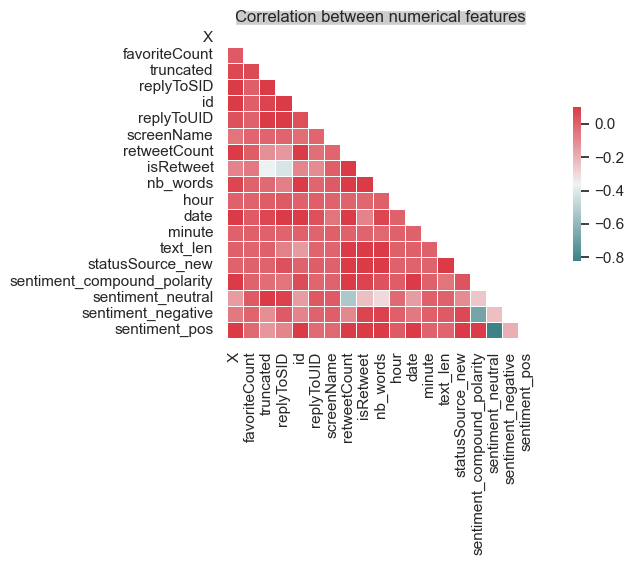

In [50]:
#from string import letters
import seaborn as sns

sns.set(style="white")
# Compute the correlation matrix
corr = tweets_num.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(920, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title('Correlation between numerical features', bbox={'facecolor':'0.8', 'pad':0})

**Baja correlación entre características numéricas (entre 0,30 y -0,30)**

# Modelando

In [51]:
from  sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from xgboost import plot_importance

In [52]:
df = data.copy()

df.head()

,X,favoriteCount,truncated,replyToSID,id,replyToUID,screenName,retweetCount,isRetweet,nb_words,hour,date,minute,text_len,statusSource_new,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos
created,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1,0,0,-999.0,7999,-999.0,1649,331.0,1,20,0,2020-01-01,0,144,104,0.1027,0.762,0.11,0.129
2020-01-01 01:40:00,2,0,0,-999.0,7998,-999.0,3039,66.0,1,11,1,2020-01-01,40,66,104,0.0000,1.000,0.00,0.000
2020-01-01 03:20:00,3,0,0,-999.0,7997,-999.0,9153,12.0,1,21,3,2020-01-01,20,142,104,0.0000,1.000,0.00,0.000
2020-01-01 05:00:00,4,0,0,-999.0,7996,-999.0,6241,338.0,1,16,5,2020-01-01,0,140,104,0.0000,1.000,0.00,0.000
2020-01-01 06:40:00,5,0,0,-999.0,7995,-999.0,960,120.0,1,9,6,2020-01-01,40,107,9,0.0000,1.000,0.00,0.000


In [53]:
df.drop("date", axis = 1, inplace = True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14940 entries, 2020-01-01 00:00:00 to 2022-11-03 10:20:00
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   X                            14940 non-null  int64  
 1   favoriteCount                14940 non-null  int64  
 2   truncated                    14940 non-null  int64  
 3   replyToSID                   14940 non-null  float64
 4   id                           14940 non-null  int64  
 5   replyToUID                   14940 non-null  float64
 6   screenName                   14940 non-null  int64  
 7   retweetCount                 14940 non-null  float64
 8   isRetweet                    14940 non-null  int64  
 9   nb_words                     14940 non-null  int64  
 10  hour                         14940 non-null  int32  
 11  minute                       14940 non-null  int32  
 12  text_len                     14940 non-

In [55]:
X = df[['favoriteCount', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'screenName',  'isRetweet', 'nb_words', 'hour', 
       'minute', 'text_len', 'statusSource_new', 'sentiment_compound_polarity', 'sentiment_neutral', 'sentiment_negative', 'sentiment_pos']]
X

,favoriteCount,truncated,replyToSID,id,replyToUID,screenName,isRetweet,nb_words,hour,minute,text_len,statusSource_new,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos
created,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0,0,-9.990000e+02,7999,-999.0,1649,1,20,0,0,144,104,0.1027,0.762,0.110,0.129
2020-01-01 01:40:00,0,0,-9.990000e+02,7998,-999.0,3039,1,11,1,40,66,104,0.0000,1.000,0.000,0.000
2020-01-01 03:20:00,0,0,-9.990000e+02,7997,-999.0,9153,1,21,3,20,142,104,0.0000,1.000,0.000,0.000
2020-01-01 05:00:00,0,0,-9.990000e+02,7996,-999.0,6241,1,16,5,0,140,104,0.0000,1.000,0.000,0.000
2020-01-01 06:40:00,0,0,-9.990000e+02,7995,-999.0,960,1,9,6,40,107,9,0.0000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-03 03:40:00,0,0,-9.990000e+02,8004,-999.0,2736,1,15,3,40,122,104,-0.3182,0.839,0.161,0.000
2022-11-03 05:20:00,0,1,-9.990000e+02,8003,-999.0,2101,0,24,5,20,140,104,0.0000,1.000,0.000,0.000
2022-11-03 07:00:00,0,0,-9.990000e+02,8002,-999.0,8805,1,19,7,0,139,104,0.4588,0.455,0.169,0.376


In [56]:
y = df['retweetCount']
y

created
2020-01-01 00:00:00    331.000000
2020-01-01 01:40:00     66.000000
2020-01-01 03:20:00     12.000000
2020-01-01 05:00:00    338.000000
2020-01-01 06:40:00    120.000000
                          ...    
2022-11-03 03:40:00      4.000000
2022-11-03 05:20:00    282.406319
2022-11-03 07:00:00     30.000000
2022-11-03 08:40:00      2.000000
2022-11-03 10:20:00      2.000000
Name: retweetCount, Length: 14940, dtype: float64

- # Estandarización o Normalización

In [ ]:
# Normalización con Min-Max Scaler
scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(X)
normalized_df = pd.DataFrame(normalized_data, columns = X.columns)

In [ ]:
transformer = RobustScaler().fit(X)

X_rob = transformer.transform(X)
X_rob = pd.DataFrame(X_rob, columns=X_train.columns)
X_rob

- # División de Datos

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  shuffle=False)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11952, 16), (2988, 16), (11952,), (2988,))

In [59]:
X_train

,favoriteCount,truncated,replyToSID,id,replyToUID,screenName,isRetweet,nb_words,hour,minute,text_len,statusSource_new,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos
created,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0,0,-999.0,7999,-999.0,1649,1,20,0,0,144,104,0.1027,0.762,0.11,0.129
2020-01-01 01:40:00,0,0,-999.0,7998,-999.0,3039,1,11,1,40,66,104,0.0000,1.000,0.00,0.000
2020-01-01 03:20:00,0,0,-999.0,7997,-999.0,9153,1,21,3,20,142,104,0.0000,1.000,0.00,0.000
2020-01-01 05:00:00,0,0,-999.0,7996,-999.0,6241,1,16,5,0,140,104,0.0000,1.000,0.00,0.000
2020-01-01 06:40:00,0,0,-999.0,7995,-999.0,960,1,9,6,40,107,9,0.0000,1.000,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-09 15:40:00,0,0,-999.0,10992,-999.0,7075,1,22,15,40,140,104,0.3818,0.278,0.00,0.722
2022-04-09 17:20:00,0,0,-999.0,10991,-999.0,10449,1,22,17,20,140,104,0.3818,0.278,0.00,0.722
2022-04-09 19:00:00,0,0,-999.0,10990,-999.0,934,1,22,19,0,140,104,0.3818,0.278,0.00,0.722


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,favoriteCount,truncated,replyToSID,id,replyToUID,screenName,isRetweet,nb_words,hour,minute,text_len,statusSource_new,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos
0,-0.076218,-0.20742,-0.224276,0.221860,-0.054107,-1.240476,0.572198,0.463021,-1.661325,-1.224745,0.112480,0.256150,0.160293,-0.201137,0.536145,0.018808
1,-0.076218,-0.20742,-0.224276,0.221646,-0.054107,-0.813195,0.572198,-1.530344,-1.516862,1.224745,-1.973618,0.256150,-0.123053,0.847000,-0.572318,-0.602760
2,-0.076218,-0.20742,-0.224276,0.221432,-0.054107,1.066222,0.572198,0.684506,-1.227936,0.000000,0.058990,0.256150,-0.123053,0.847000,-0.572318,-0.602760
3,-0.076218,-0.20742,-0.224276,0.221217,-0.054107,0.171086,0.572198,-0.422919,-0.939010,-1.224745,0.005500,0.256150,-0.123053,0.847000,-0.572318,-0.602760
4,-0.076218,-0.20742,-0.224276,0.221003,-0.054107,-1.452271,0.572198,-1.973314,-0.794547,1.224745,-0.877080,-4.902551,-0.123053,0.847000,-0.572318,-0.602760


- # Modelando

In [61]:
#Just simple  and single model
model = XGBRegressor(n_estimators = 500, objective='reg:squarederror',)

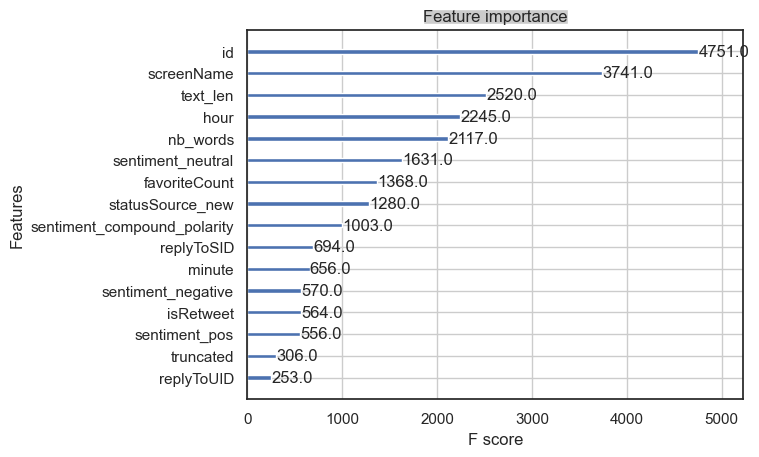

In [62]:
model.fit(X_train_scaled,y_train)
# plot feature importance
plot_importance(model,)
plt.title('Feature importance', bbox={'facecolor':'0.8', 'pad':0})
plt.show()

- ## Predicciones

In [63]:
y_hat = model.predict(X_test_scaled)
y_hat

array([1331.0055   , 1337.3805   , 1329.8054   , ...,    6.8829284,
         11.5039215,   74.176674 ], dtype=float32)

In [64]:
# Para evaluación de métricas
# ==============================================================================
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [65]:
from sklearn import metrics

def timeseries_evaluacion_metrica_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Resultados de la métrica de evaluación:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [66]:
timeseries_evaluacion_metrica_func(y_test, y_hat)

Resultados de la métrica de evaluación:-
MSE is : 18381.308313431065
MSE is : 66.70594043026236
RMSE is : 135.57768368515175
MAPE is : 1112.928918223636
R2 is : 0.8900410890551393



In [67]:
test=pd.DataFrame(y_test)
test["pred"] = y_hat
test

,retweetCount,pred
created,,
2022-04-10 00:00:00,1333.000000,1331.005493
2022-04-10 01:40:00,1333.000000,1337.380493
2022-04-10 03:20:00,1333.000000,1329.805420
2022-04-10 05:00:00,1333.000000,1332.412964
2022-04-10 06:40:00,282.406319,736.492126
...,...,...
2022-11-03 03:40:00,4.000000,21.691553
2022-11-03 05:20:00,282.406319,351.582642
2022-11-03 07:00:00,30.000000,6.882928


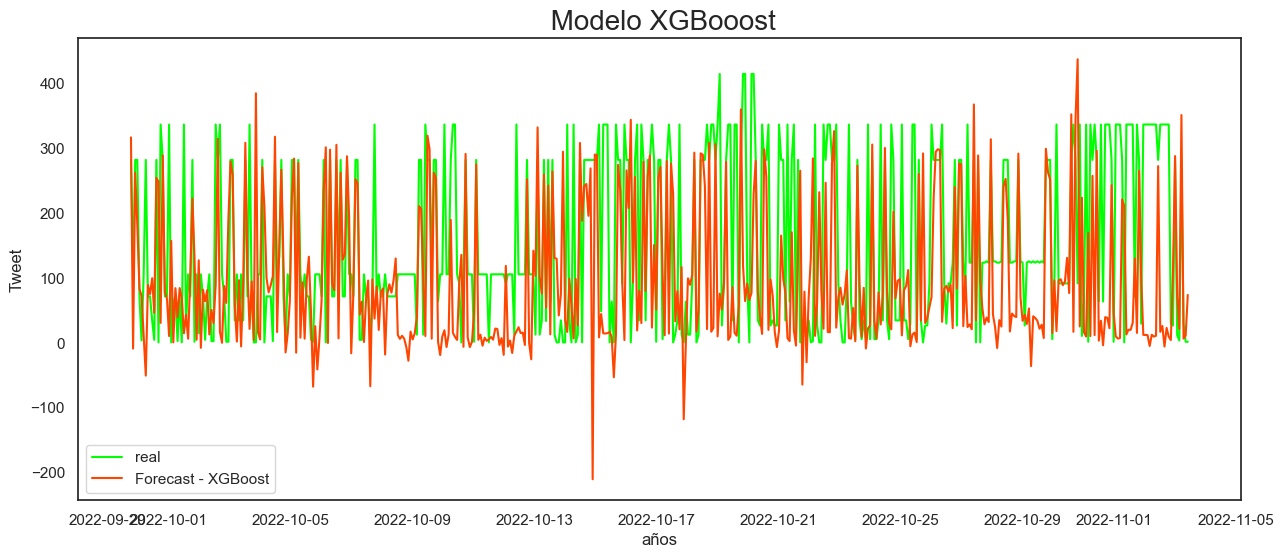

In [68]:
plt.figure(figsize=(15,6))
plt.plot(test["retweetCount"].tail(500),color="lime", label="real")
plt.plot(test["pred"].tail(500),color="orangered", label="Forecast - XGBoost")
plt.title(" Modelo XGBooost", fontsize=20)
plt.xlabel('años')
plt.ylabel("Tweet")
plt.legend()
plt.show();

- ## Hyperparametros

In [69]:
import optuna
from optuna import Trial, visualization

In [70]:
from xgboost import XGBRegressor
import optuna

def objective(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear']),
        'max_depth': trial.suggest_int('max_depth', 3, 100),
        #'max_leaves': trial.suggest_int('max_leaves', 8, 1024),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1500),
        #'min_child_weight': trial.suggest_int('min_child_weight', 10, 20),
        #'subsample': trial.suggest_float('subsample', 0.3, 0.9),
        #'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.5),
        #'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 1.0),
        #'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.3, 0.8),
        #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        #'colsample_bynode': trial.suggest_float('colsample_bynode', 0.01, 0.5),
        #"random_state" : trial.suggest_categorical('random_state', [42]),
        'objective': trial.suggest_categorical('objective', ['reg:squarederror']),
        "n_jobs" : trial.suggest_categorical('n_jobs', [-1]),
        #'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        #'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True)
    }

    model_xgb = XGBRegressor(**params)
    
    # fit model
    model.fit(X_train_scaled, y_train)

    p = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, p)

    return rmse

In [71]:
study = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=50,show_progress_bar=True)

[I 2024-08-02 12:39:06,684] A new study created in memory with name: no-name-5f09103e-e4f6-4dc1-9bc9-74e89b0ea418


  0%|          | 0/50 [00:00<?, ?it/s]

In [72]:
print("Number of finished trials: {}".format(len(study.trials)))
print('Best trial:', study.best_trial.params)

Number of finished trials: 50
Best trial: {'booster': 'gbtree', 'max_depth': 97, 'learning_rate': 0.04415488980177221, 'n_estimators': 388, 'objective': 'reg:squarederror', 'n_jobs': -1}


In [73]:
best_params = study.best_trial.params
best_params

{'booster': 'gbtree',
 'max_depth': 97,
 'learning_rate': 0.04415488980177221,
 'n_estimators': 388,
 'objective': 'reg:squarederror',
 'n_jobs': -1}

In [74]:
mejor_param = XGBRegressor(**best_params)

In [75]:
# Entrenamos el modelos
mejor_param.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04415488980177221,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=97, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=388, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
# Predicciones
mejor_pred = mejor_param.predict(X_test_scaled)
mejor_pred

array([1332.9994   , 1332.9994   , 1332.9987   , ...,   23.65489  ,
          6.7136726,  154.16151  ], dtype=float32)

In [77]:
test_param = pd.DataFrame(y_test)
test_param["xgb_param"] = mejor_pred
test_param

,retweetCount,xgb_param
created,,
2022-04-10 00:00:00,1333.000000,1332.999390
2022-04-10 01:40:00,1333.000000,1332.999390
2022-04-10 03:20:00,1333.000000,1332.998657
2022-04-10 05:00:00,1333.000000,1332.990967
2022-04-10 06:40:00,282.406319,274.141907
...,...,...
2022-11-03 03:40:00,4.000000,-0.732388
2022-11-03 05:20:00,282.406319,271.019318
2022-11-03 07:00:00,30.000000,23.654890


In [78]:
timeseries_evaluacion_metrica_func(y_test, mejor_pred)

Resultados de la métrica de evaluación:-
MSE is : 32792.33010383401
MSE is : 76.26085691981307
RMSE is : 181.08652656626336
MAPE is : 1213.1215021624541
R2 is : 0.8038328477996736



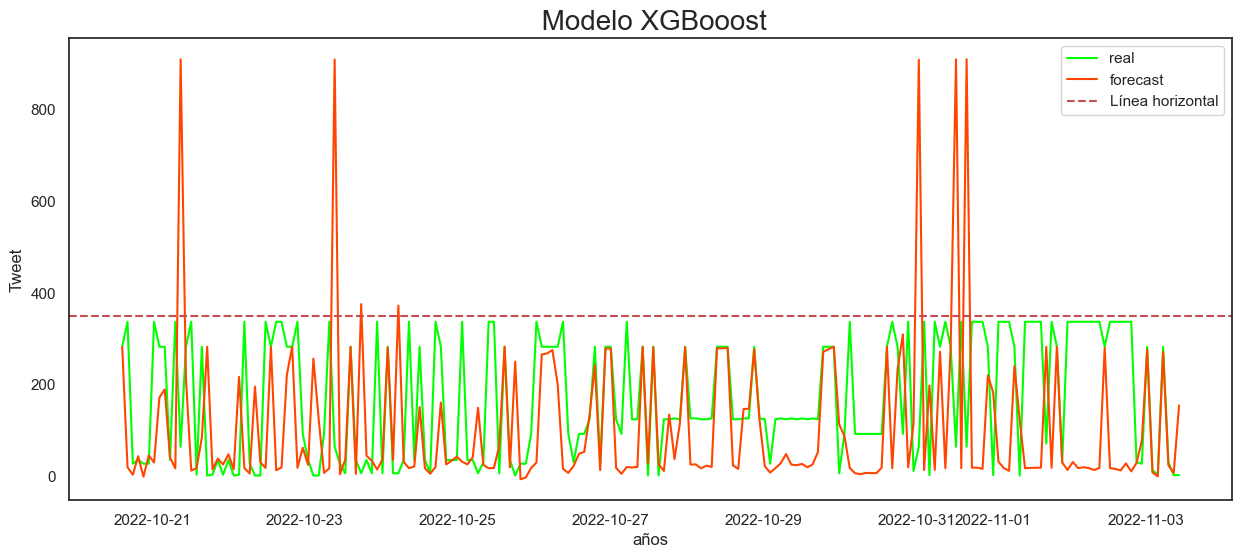

In [79]:
plt.figure(figsize=(15,6))
plt.plot(test_param["retweetCount"].tail(200),color="lime", label="real")
plt.plot(test_param["xgb_param"].tail(200),color="orangered", label="forecast")
# Dibujar una línea horizontal en y=3
plt.axhline(y = 350, color='r', linestyle='--', label='Línea horizontal')
plt.title(" Modelo XGBooost", fontsize=20)
plt.xlabel('años')
plt.ylabel("Tweet")
plt.legend()
plt.show();

- # Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf = RandomForestRegressor()

# Entrenar el modelo
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [82]:
# predicciones

rf_hat = rf.predict(X_test_scaled)
rf_hat

array([1333.        , 1333.        , 1333.        , ...,   24.82      ,
         31.06      ,  164.45566481])

In [83]:
test_rf = pd.DataFrame(y_test)
test_rf["rf"] = rf_hat
test_rf

,retweetCount,rf
created,,
2022-04-10 00:00:00,1333.000000,1333.000000
2022-04-10 01:40:00,1333.000000,1333.000000
2022-04-10 03:20:00,1333.000000,1333.000000
2022-04-10 05:00:00,1333.000000,1333.000000
2022-04-10 06:40:00,282.406319,243.029434
...,...,...
2022-11-03 03:40:00,4.000000,12.930000
2022-11-03 05:20:00,282.406319,254.265687
2022-11-03 07:00:00,30.000000,24.820000


In [84]:
timeseries_evaluacion_metrica_func(y_test, rf_hat)

Resultados de la métrica de evaluación:-
MSE is : 21450.81869822888
MSE is : 66.17620975935048
RMSE is : 146.46098012176785
MAPE is : 1084.6755074728499
R2 is : 0.8716789565403561



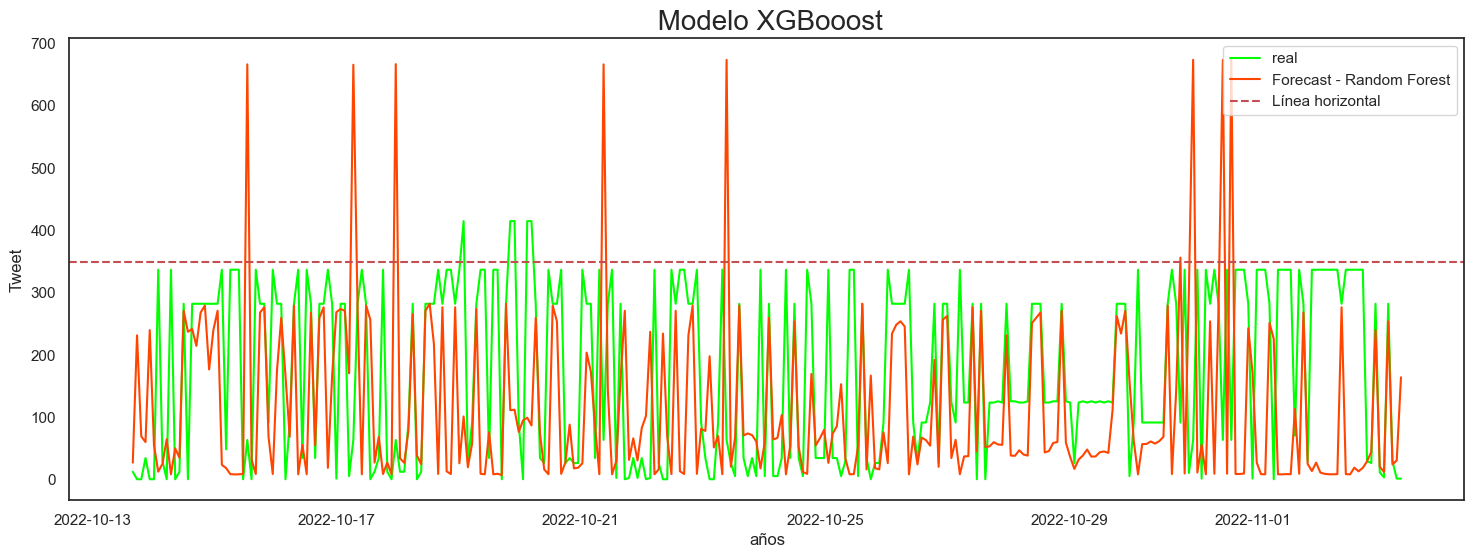

In [85]:
plt.figure(figsize=(18,6))
plt.plot(test_rf["retweetCount"].tail(300),color="lime", label="real")
plt.plot(test_rf["rf"].tail(300),color="orangered", label="Forecast - Random Forest")
# Dibujar una línea horizontal en y=3
plt.axhline(y = 350, color='r', linestyle='--', label='Línea horizontal')
plt.title(" Modelo XGBooost", fontsize=20)
plt.xlabel('años')
plt.ylabel("Tweet")
plt.legend()
plt.show();

- # Hyperparameter Optimization

In [86]:
def objective(trial):
    # Hiperparametrelerin aralıklarını belirle

    params = {
    "n_estimators" : trial.suggest_int('n_estimators', 100, 2000),
    "max_depth" : trial.suggest_int('max_depth', 2, 10, log=True),
    "min_samples_split" : trial.suggest_int('min_samples_split', 2, 10),
    "min_samples_leaf" : trial.suggest_int('min_samples_leaf', 1, 10),
    "max_features" : trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
    "bootstrap" : trial.suggest_categorical('bootstrap', [True, False])

    }

    # Random Forest Classifier modelini oluştur
    model = RandomForestRegressor(**params)

    # Modeli eğit
    model.fit(X_train_scaled, y_train)

    # Test seti üzerinde tahmin yap
    y_pred = model.predict(X_test_scaled)

    rmse = mean_squared_error(y_test, y_pred)
    
    return rmse

In [87]:
study = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(objective, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [88]:
best_params_rf = study.best_trial.params
best_params_rf

{'n_estimators': 242,
 'max_depth': 5,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': None,
 'bootstrap': True}

In [89]:
rf_best = RandomForestRegressor(**best_params_rf)
rf_best

RandomForestRegressor(max_depth=5, max_features=None, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=242)

In [90]:
# entrenamos el modelo
rf_best.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, max_features=None, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=242)

In [91]:
rf_pred_best = rf_best.predict(X_test_scaled)
rf_pred_best

array([1272.76451517, 1272.76451517, 1272.76451517, ...,  286.50299959,
        102.45923315,  227.01001374])

In [92]:
test_rf_best = pd.DataFrame(y_test)
test_rf_best["rf"] = rf_pred_best
test_rf_best

,retweetCount,rf
created,,
2022-04-10 00:00:00,1333.000000,1272.764515
2022-04-10 01:40:00,1333.000000,1272.764515
2022-04-10 03:20:00,1333.000000,1272.764515
2022-04-10 05:00:00,1333.000000,1272.764515
2022-04-10 06:40:00,282.406319,229.382206
...,...,...
2022-11-03 03:40:00,4.000000,102.459233
2022-11-03 05:20:00,282.406319,229.382206
2022-11-03 07:00:00,30.000000,286.503000


In [93]:
timeseries_evaluacion_metrica_func(y_test, rf_pred_best)

Resultados de la métrica de evaluación:-
MSE is : 17368.307972301645
MSE is : 80.65626148754541
RMSE is : 131.7888765120245
MAPE is : 1454.813198826981
R2 is : 0.8961009631619228



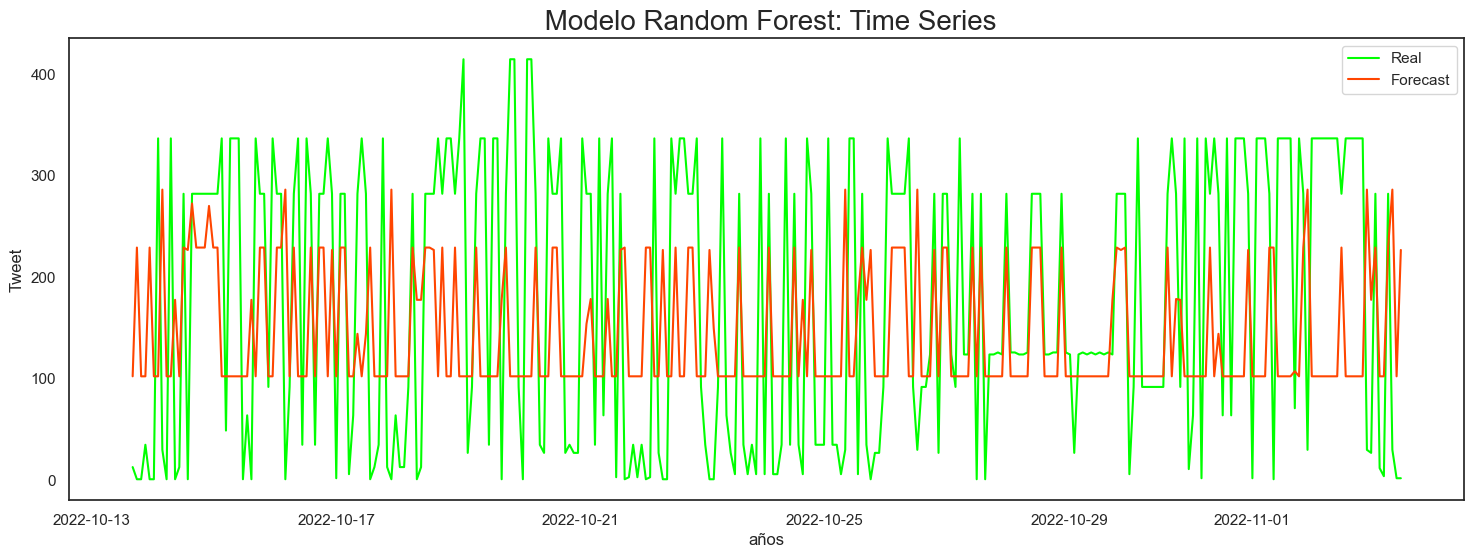

In [94]:
plt.figure(figsize=(18,6))
plt.plot(test_rf_best["retweetCount"].tail(300),color="lime", label = "Real")
plt.plot(test_rf_best["rf"].tail(300),color="orangered", label = "Forecast")
# Dibujar una línea horizontal en y=3
#plt.axhline(y = 350, color='r', linestyle='--', label='Línea horizontal')
plt.title(" Modelo Random Forest: Time Series", fontsize=20)
plt.xlabel('años')
plt.ylabel("Tweet")
plt.legend()
plt.show();

# Conclusión

In [95]:
print("XGBoost", timeseries_evaluacion_metrica_func(y_test, y_hat))

Resultados de la métrica de evaluación:-
MSE is : 18381.308313431065
MSE is : 66.70594043026236
RMSE is : 135.57768368515175
MAPE is : 1112.928918223636
R2 is : 0.8900410890551393

XGBoost None


In [96]:
print("XGBoost con Hyper:", timeseries_evaluacion_metrica_func(y_test, mejor_pred))

Resultados de la métrica de evaluación:-
MSE is : 32792.33010383401
MSE is : 76.26085691981307
RMSE is : 181.08652656626336
MAPE is : 1213.1215021624541
R2 is : 0.8038328477996736

XGBoost con Hyper: None


In [97]:
print("Random Forest:", timeseries_evaluacion_metrica_func(y_test, rf_hat))

Resultados de la métrica de evaluación:-
MSE is : 21450.81869822888
MSE is : 66.17620975935048
RMSE is : 146.46098012176785
MAPE is : 1084.6755074728499
R2 is : 0.8716789565403561

Random Forest: None


In [98]:
print("Random Forest Hyper:", timeseries_evaluacion_metrica_func(y_test, rf_pred_best))

Resultados de la métrica de evaluación:-
MSE is : 17368.307972301645
MSE is : 80.65626148754541
RMSE is : 131.7888765120245
MAPE is : 1454.813198826981
R2 is : 0.8961009631619228

Random Forest Hyper: None
